In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/codsoft1/Titanic-Dataset.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

print(df.head())  # Check if data loads correctly


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
# Check for missing values in X_train
print(X_train.isnull().sum())

# Fill missing values in the dataset
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


In [ ]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)


<ipython-input-16-74648d25f265>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
<ipython-input-16-74648d25f265>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]  # Ensure y_train matches the indices of X_train
y_test = y_test[X_test.index]


In [ ]:
print(X_train.isnull().sum())  # Should print 0 for all columns
print(X_test.isnull().sum())   # Should print 0 for all columns


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
import os
print(os.listdir())  # Lists files in the current directory


['.config', 'drive', 'Titanic-Dataset.csv', 'sample_data']


In [ ]:
import os
print(os.listdir())  # Lists files in the current directory


['.config', 'drive', 'Titanic-Dataset.csv', 'sample_data']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Convert 'male' to 1, 'female' to 0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Select features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.81


In [ ]:
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[90 15]
 [19 55]]


<ipython-input-25-5e9cadbacedd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Prediction'], palette=['red', 'green'])


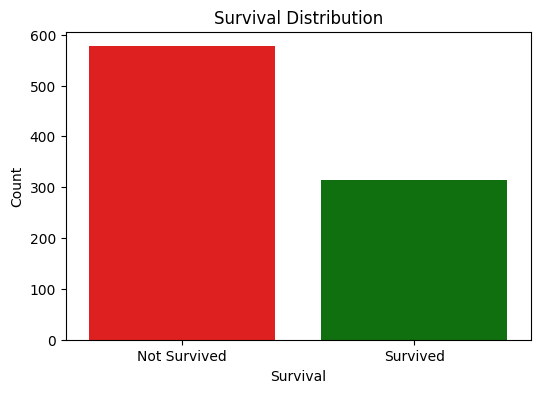

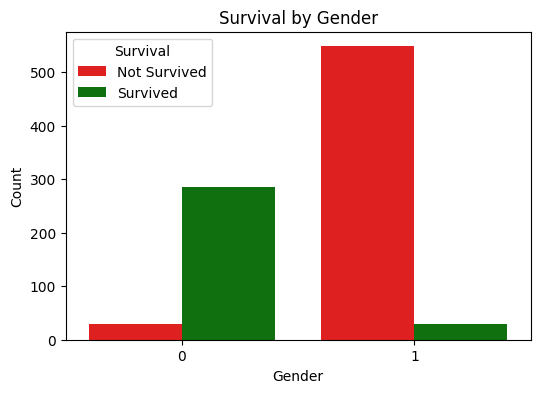

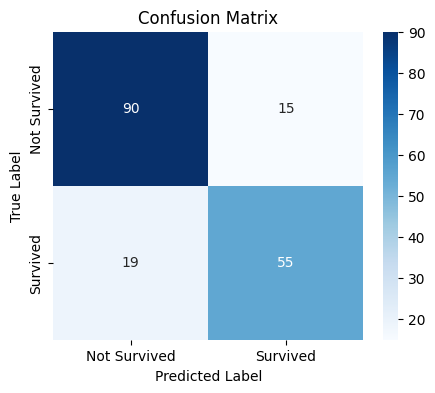

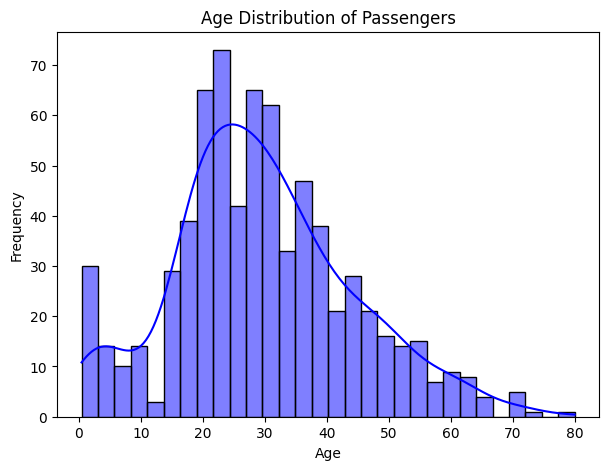

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming df is your DataFrame with 'Prediction' and 'Sex' columns

# Convert 'Prediction' back to numerical values for analysis
df['Prediction'] = df['Prediction'].map({"Not Survived": 0, "Survived": 1})

# 1. Bar Plot - Survival Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Prediction'], palette=['red', 'green'])
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title("Survival Distribution")
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()

# 2. Count Plot - Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Prediction", data=df, palette=['red', 'green'])
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survival", labels=['Not Survived', 'Survived'])
plt.show()

# 3. Confusion Matrix Heatmap
cm = np.array([[90, 15], [19, 55]])  # Replace with actual confusion matrix values
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 4. Age Distribution Histogram
plt.figure(figsize=(7,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Check for missing values
print(X.isnull().sum())  # This will show which columns have NaN

# Fill missing values
X = X.fillna(X.median())  # Replace NaN with median values

# Now, make predictions
df['Prediction'] = model.predict(X)

# Map results to readable labels
df['Prediction'] = df['Prediction'].map({0: "Not Survived", 1: "Survived"})

# Display results
print(df[['PassengerId', 'Name', 'Prediction']].head(10))


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
   PassengerId                                               Name  \
0            1                            Braund, Mr. Owen Harris   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3                             Heikkinen, Miss. Laina   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5                           Allen, Mr. William Henry   
5            6                                   Moran, Mr. James   
6            7                            McCarthy, Mr. Timothy J   
7            8                     Palsson, Master. Gosta Leonard   
8            9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10                Nasser, Mrs. Nicholas (Adele Achem)   

     Prediction  
0  Not Survived  
1      Survived  
2      Survived  
3      Survived  
4  Not Survived  
5  Not 